# Importing Libraries

In [150]:
#basic Libraries
import numpy as np
import pandas as pd
import warnings
import scipy

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries set up
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')


#NLP
from bs4 import BeautifulSoup 
import re
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import RegexpTokenizer
import nltk

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE as RFE
from sklearn.metrics import r2_score

# 1. Loading the dataset

In [151]:
df = pd.read_csv("spotify_dataset.csv", encoding='ISO-8859-1')

#got an error (UnicodeDecodeError: "utf-8") when loading the dataset for the 1st time. 
#The UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error 
#is a common error that occurs when trying to read a file with Pandas that contains non-UTF-8 encoded characters. 
#UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there. 
#If you try to read a file with a different encoding format, you may encounter this error.

# 2. Initial exploration

In [152]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [153]:
df.shape

(952, 24)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   8

In [155]:
conditions = [    
    (df["released_month"] > 11) | (df["released_month"] <= 3),
    (df["released_month"] == 4) | (df["released_month"] == 5),
    (df["released_month"] >= 6) | (df["released_month"] <= 9),
    (df["released_month"] == 10) | (df["released_month"] == 11)
]

# create a list of the values we want to assign for each condition
values = ['Winter', 'Spring', 'Summer', 'Fall']
    
# create a new column and use np.select to assign values to it using our lists as arguments
df['released_season'] = np.select(conditions, values)

In [156]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,Winter
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,Summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,Summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,Spring
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,Summer
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,Winter
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,Summer
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,Spring
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,Winter


# NLP

In [157]:
#Cleaning artists name

def name_to_words(raw_name):
    '''
    Function to convert an artist name to a string of words
    The input is a single string , and 
    the output is a single string (a cleaned artist name)
    '''
 
    name_text = BeautifulSoup(raw_name).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", name_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))

In [158]:
df['clean_name'] = df['artist(s)_name'].apply(name_to_words)

In [159]:
df[['artist(s)_name','clean_name']]

,artist(s)_name,clean_name
0,"Latto, Jung Kook",latto jung kook
1,Myke Towers,myke towers
2,Olivia Rodrigo,olivia rodrigo
3,Taylor Swift,taylor swift
4,Bad Bunny,bad bunny
...,...,...
947,Selena Gomez,selena gomez
948,Taylor Swift,taylor swift
949,"Feid, Paulo Londra",feid paulo londra
950,"Feid, Sech, Jhayco",feid sech jhayco


In [160]:
nlp = spacy.load('en_core_web_sm')

In [161]:
# Function to add NLP features to the dataframe
def add_nlp_features(text):
    doc = nlp(text)
    features = {
        'LENGTH': len(text),
        'TOKENS': [token.text for token in doc],
        'POS': [token.pos_ for token in doc],
        'ENTITIES': [(ent.text, ent.label_) for ent in doc.ents],
    }
    return pd.Series(features)

In [162]:
# Apply the function to the "clean_name" column and add the resulting features as new columns

nlp_features = df['clean_name'].apply(add_nlp_features)

df = pd.concat([df, nlp_features], axis=1)

In [163]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_season,clean_name,LENGTH,TOKENS,POS,ENTITIES
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,31,0,8,4,Summer,latto jung kook,15,"[latto, jung, kook]","[PROPN, PROPN, PROPN]","[(latto jung kook, PERSON)]"
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,7,0,10,4,Winter,myke towers,11,"[myke, towers]","[NOUN, NOUN]",[]
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,17,0,31,6,Summer,olivia rodrigo,14,"[olivia, rodrigo]","[PROPN, PROPN]",[]
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,11,0,11,15,Summer,taylor swift,12,"[taylor, swift]","[PROPN, NOUN]","[(taylor, PERSON)]"
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,14,63,11,6,Spring,bad bunny,9,"[bad, bunny]","[ADJ, NOUN]","[(bad bunny, PERSON)]"


In [164]:
df.shape

(952, 30)

In [165]:
# 2nd approach: using TFID Vectorizer to extract features

# Initialize the TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer()


In [166]:
# Fit and transform the text data
#tfidf_features = tfidf_vectorizer.fit_transform(df['clean_name'])

In [167]:
# Add TF-IDF features as new columns in the original dataframe
#for i, feature in enumerate(tfidf_vectorizer.get_feature_names_out()):
    #df[f'TFIDF_{feature}'] = tfidf_features[:, i].toarray()

In [168]:
##df.shape

# 3. Data cleaning and imputation

In [169]:
#Dropping columns not needed for this analysis

df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day", "clean_name"], axis=1, inplace=True)

In [170]:
df.shape

(952, 24)

In [171]:
# Checking for null values, we found some missing values in 2 columns.
#"in_shazam_charts" has 50/952 = 5% missing values and "key" has 10% missing values.
df.isnull().sum()

artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_season          0
LENGTH                   0
TOKENS                   0
POS                      0
ENTITIES                 0
dtype: int64

In [172]:
#Handling missing values
#We can fill "in_shazam_charts" column with the AVG of in_spotify_charts, in_apple_charts and in_deezer_charts

#mean_charts = sum(df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts"]].mean())/3
##print(mean_charts)

# fill NaN values with the mean of each column
#df["in_shazam_charts"].fillna(mean_charts, inplace=True)

#We decide to drop the key and the shazam_charts columns
df.drop("key", axis=1, inplace=True)
df.drop("in_shazam_charts", axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          952 non-null    int64 
 1   in_spotify_playlists  952 non-null    int64 
 2   in_spotify_charts     952 non-null    int64 
 3   streams               952 non-null    int64 
 4   in_apple_playlists    952 non-null    int64 
 5   in_apple_charts       952 non-null    int64 
 6   in_deezer_playlists   952 non-null    int64 
 7   in_deezer_charts      952 non-null    int64 
 8   bpm                   952 non-null    int64 
 9   mode                  952 non-null    object
 10  danceability_%        952 non-null    int64 
 11  valence_%             952 non-null    int64 
 12  energy_%              952 non-null    int64 
 13  acousticness_%        952 non-null    int64 
 14  instrumentalness_%    952 non-null    int64 
 15  liveness_%            952 non-null    in

In [173]:
df.isnull().sum()

artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_season         0
LENGTH                  0
TOKENS                  0
POS                     0
ENTITIES                0
dtype: int64

In [174]:
df.shape

(952, 22)

In [176]:
# Check for duplicates
#df.duplicated().sum()

TypeError: unhashable type: 'list'

# 4. Relationships in data

In [177]:
# Get summary statistics of the numerical data
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,LENGTH
count,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,14.910714
std,0.893331,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,11.085909
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1.000000
25%,1.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,8.000000
50%,1.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,12.000000
75%,2.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,19.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,96.000000


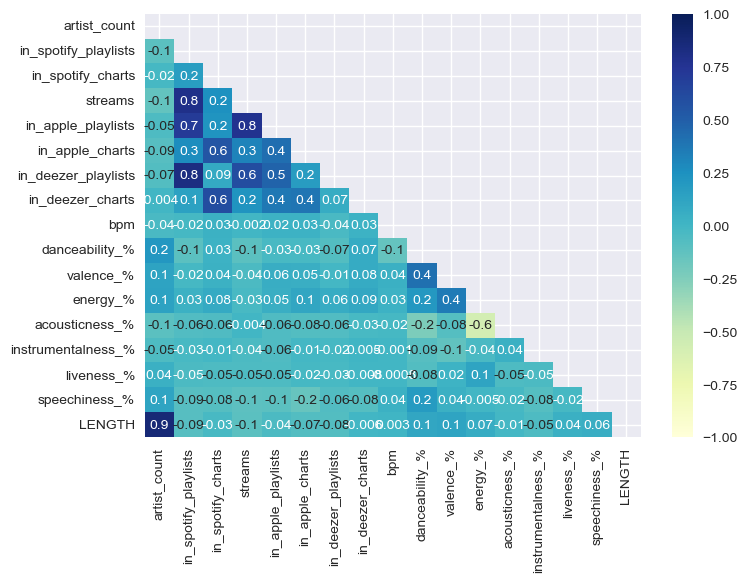

In [178]:
#Looking at correlation between variables

# creating mask to hide redundant information
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
  
# plotting correlation heatmap 
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt='.1g', mask=mask, vmin = -1, vmax = 1)

plt.show();

In [179]:
print(df.corr(numeric_only=True)["streams"].sort_values(ascending=False))


streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
bpm                    -0.002438
acousticness_%         -0.004485
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
LENGTH                 -0.109219
speechiness_%          -0.112333
artist_count           -0.136463
Name: streams, dtype: float64


In [180]:
# dropping low correlated variables

df.drop(columns= ["bpm", "acousticness_%", "energy_%", "valence_%", "instrumentalness_%", "liveness_%"], axis=1, inplace=True)

In [181]:
df.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS,POS,ENTITIES
0,2,553,147,141381703,43,263,45,10,Major,80,4,Summer,15,"[latto, jung, kook]","[PROPN, PROPN, PROPN]","[(latto jung kook, PERSON)]"
1,1,1474,48,133716286,48,126,58,14,Major,71,4,Winter,11,"[myke, towers]","[NOUN, NOUN]",[]
2,1,1397,113,140003974,94,207,91,14,Major,51,6,Summer,14,"[olivia, rodrigo]","[PROPN, PROPN]",[]
3,1,7858,100,800840817,116,207,125,12,Major,55,15,Summer,12,"[taylor, swift]","[PROPN, NOUN]","[(taylor, PERSON)]"
4,1,3133,50,303236322,84,133,87,15,Minor,65,6,Spring,9,"[bad, bunny]","[ADJ, NOUN]","[(bad bunny, PERSON)]"


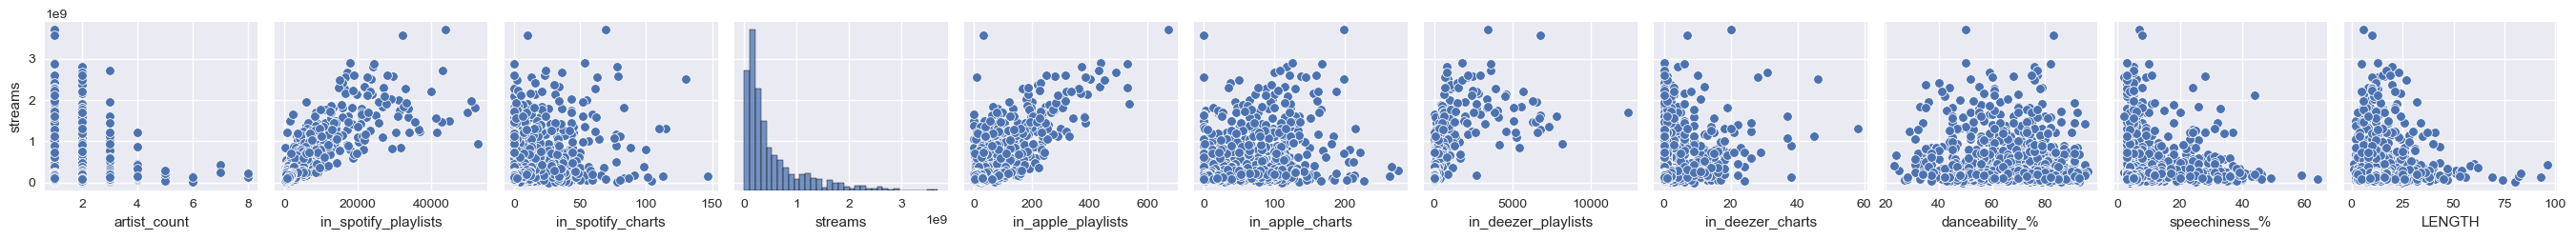

In [182]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();

## Handling outliers

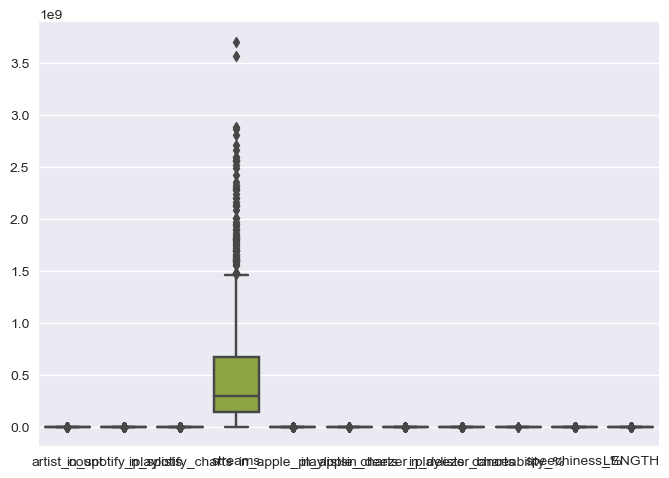

In [183]:
#We have a look to the distribution of our data to see if it is skwee (which means outliers are present)

sns.boxplot(df)
plt.show()

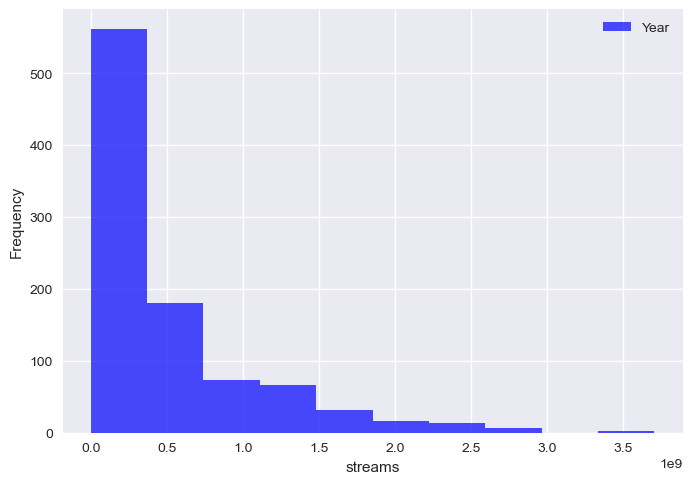

In [184]:
#Our target variable is positively (right) skweed
plt.hist(df['streams'], bins=10, color='blue', alpha=0.7, label='Year')
plt.xlabel('streams')
plt.ylabel('Frequency')
plt.legend()
plt.show();

<Axes: xlabel='streams', ylabel='Count'>

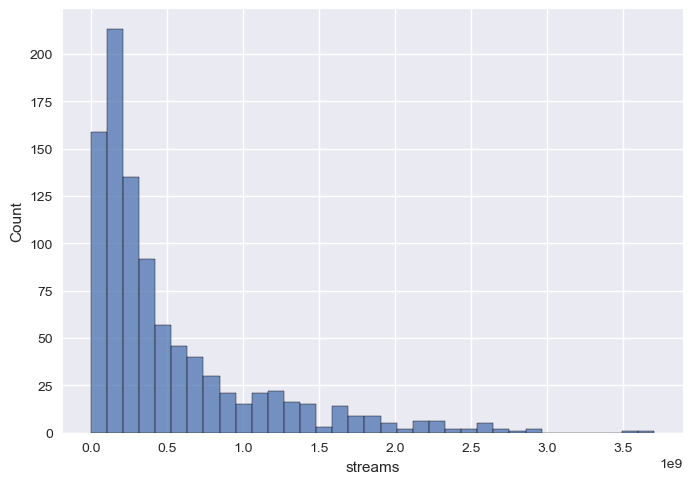

In [185]:
sns.histplot(df['streams'])

One common approach used for outlier detection is the Interquartile Range (IQR) which gives us an idea of how spread out the values in the middle of our data set are. 

This method works by sorting your dataset from the smallest to the largest values, then dividing in into four equal parts (called the quartiles). This leaves you with three points:
- **Q1 (first quartile)** - The 25th percentile. 25 percent of the data falls below this point.
- **Q2 (second quartile)** - The median. 50 percent of the data falls below and above this point.
- **Q2 (second quartile)** - The 75th percentile. 75 percent of the data falls below this point.

Using these points, you calculate the **Interquartile Range (IQR)** which is the range between the first and third quartiles

In [186]:
# Find the 75th and 25th percentiles
stream_seventy_fifth = df["streams"].quantile(0.75)
stream_twenty_fifth = df["streams"].quantile(0.25)

# Calculate iqr
streams_iqr = stream_seventy_fifth - stream_twenty_fifth

# Calculate the thresholds
upper = stream_seventy_fifth + (1.5 * streams_iqr)
lower = stream_twenty_fifth - (1.5 * streams_iqr)

# Subset the data
df1 = df[(df["streams"] > lower) & (df["streams"] < upper)]



In [187]:
df1.describe()


,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,speechiness_%,LENGTH
count,878.000000,878.000000,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1.578588,3709.158314,11.146925,3.864873e+08,52.382688,49.150342,197.282460,2.498861,67.328018,10.361048,15.140091
std,0.913648,5325.048172,18.708715,3.469503e+08,58.081386,49.295818,702.389481,5.730303,14.607816,10.068553,11.384929
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,23.000000,2.000000,1.000000
25%,1.000000,824.750000,0.000000,1.344907e+08,12.000000,6.000000,12.000000,0.000000,58.000000,4.000000,9.000000
50%,1.000000,1940.500000,2.000000,2.599158e+08,29.500000,33.500000,37.500000,0.000000,70.000000,6.000000,12.000000
75%,2.000000,4437.750000,15.000000,5.366705e+08,73.000000,82.000000,114.000000,2.000000,79.000000,12.000000,19.000000
max,8.000000,52898.000000,147.000000,1.457139e+09,387.000000,275.000000,8215.000000,58.000000,96.000000,64.000000,96.000000


<Axes: xlabel='streams', ylabel='Count'>

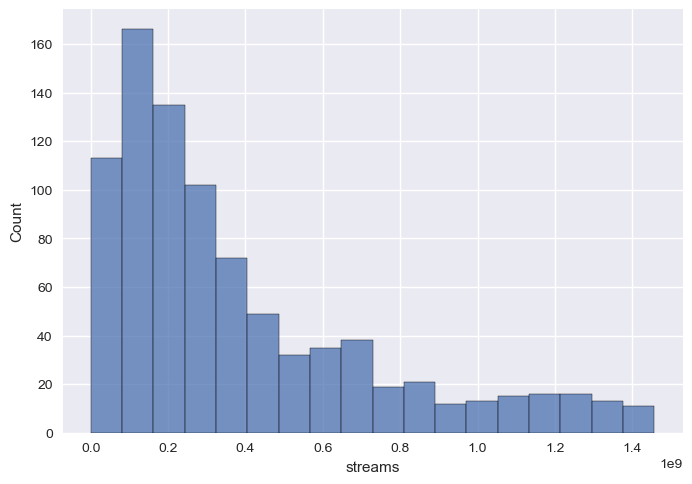

In [188]:
sns.histplot(df1['streams'])

In [189]:
#df1 is the dataset that not contains outliers in our target variable, but another option is standardizing numerical variables so extreme values do not affect our model.

# 5. Other considerations
 
## Encoding categorical variables, standarizing numerical data...

In [190]:
#We drop the Entities because it will be mainly Person

df.drop(columns= ["ENTITIES"], axis=1, inplace=True)

In [191]:
#Tokens, POS and ENtities are an array of list. We transforme it into string type and will get an unique combination of artists as a string in each row.
#We decide to do the same on the POS to represent the pattern of the grammatical pattern of the token

#list=['1','2','3','4']
#' '.join(str(e) for e in list)

def stringify_tokens(list):
    return ' '.join(str(e) for e in list)

def stringify_pos(list):
    return ' '.join(str(e) for e in list)

In [192]:
df["TOKENS"] = df["TOKENS"].apply(stringify_tokens)

In [193]:
df["POS"] = df["POS"].apply(stringify_pos)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          952 non-null    int64 
 1   in_spotify_playlists  952 non-null    int64 
 2   in_spotify_charts     952 non-null    int64 
 3   streams               952 non-null    int64 
 4   in_apple_playlists    952 non-null    int64 
 5   in_apple_charts       952 non-null    int64 
 6   in_deezer_playlists   952 non-null    int64 
 7   in_deezer_charts      952 non-null    int64 
 8   mode                  952 non-null    object
 9   danceability_%        952 non-null    int64 
 10  speechiness_%         952 non-null    int64 
 11  released_season       952 non-null    object
 12  LENGTH                952 non-null    int64 
 13  TOKENS                952 non-null    object
 14  POS                   952 non-null    object
dtypes: int64(11), object(4)
memory usage: 11

In [195]:
df

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS,POS
0,2,553,147,141381703,43,263,45,10,Major,80,4,Summer,15,latto jung kook,PROPN PROPN PROPN
1,1,1474,48,133716286,48,126,58,14,Major,71,4,Winter,11,myke towers,NOUN NOUN
2,1,1397,113,140003974,94,207,91,14,Major,51,6,Summer,14,olivia rodrigo,PROPN PROPN
3,1,7858,100,800840817,116,207,125,12,Major,55,15,Summer,12,taylor swift,PROPN NOUN
4,1,3133,50,303236322,84,133,87,15,Minor,65,6,Spring,9,bad bunny,ADJ NOUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,953,0,91473363,61,13,37,1,Major,60,3,Summer,12,selena gomez,NOUN NOUN
948,1,1180,0,121871870,4,0,8,0,Major,42,6,Summer,12,taylor swift,PROPN NOUN
949,2,573,0,73513683,2,0,7,0,Major,80,6,Summer,17,feid paulo londra,ADJ NOUN NOUN
950,3,1320,0,133895612,29,26,17,0,Major,82,5,Summer,16,feid sech jhayco,ADJ NOUN PROPN


In [196]:
#Scale Numerical Data with StandardScaler()

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_z = df.copy()

scaler = StandardScaler()
num_cols = df_z.select_dtypes(include=np.number).columns

df_z[num_cols] = scaler.fit_transform(df[num_cols])

df_z.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS,POS
0,0.496468,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,Major,0.890052,-0.619429,Summer,0.008058,latto jung kook,PROPN PROPN PROPN
1,-0.623526,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,Major,0.274608,-0.619429,Winter,-0.352950,myke towers,NOUN NOUN
2,-0.623526,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,Major,-1.093045,-0.417616,Summer,-0.082194,olivia rodrigo,PROPN PROPN
3,-0.623526,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,Major,-0.819514,0.490540,Summer,-0.262698,taylor swift,PROPN NOUN
4,-0.623526,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,Minor,-0.135688,-0.417616,Spring,-0.533454,bad bunny,ADJ NOUN


In [197]:
#Encoding categorical variables, done after standarization (so standarization was only applied on the "original" numerical columns)

#One-hot-encoding

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_z.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_z[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_z, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)



In [198]:
df_encoded.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,speechiness_%,...,POS_VERB PROPN PROPN,POS_VERB PROPN PROPN PROPN PROPN,POS_VERB PROPN PROPN PROPN PROPN PROPN PROPN PROPN,POS_VERB PROPN PROPN PROPN PROPN PROPN PROPN PROPN NOUN,POS_VERB PROPN PROPN PROPN PROPN PROPN PROPN PROPN PROPN,POS_VERB PROPN PROPN PROPN VERB PROPN NOUN,POS_VERB X,POS_X,POS_X X NOUN ADJ NOUN PROPN PROPN PROPN PROPN,POS_X X NOUN PROPN PROPN
0,0.496468,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,0.890052,-0.619429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.623526,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,0.274608,-0.619429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.623526,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,-1.093045,-0.417616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.623526,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,-0.819514,0.490540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.623526,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,-0.135688,-0.417616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Model

##  Specifying Feature and Target variables for our model and spliting the sample into training and testing sets

In [199]:


# Select Features
X = df_encoded.drop('streams', axis=1)

# Select Target
y = df_encoded['streams']

# Set Training and Testing Data

X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (761, 822)
Shape of testing feature: (191, 822)
Shape of training label: (761,)
Shape of testing label: (191,)


## 1. Linear Regression Model 

Fitting the model. **The best-fitting line** minimises the difference between the predicted values and the actual values in the data

In [200]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Interpret the model

In [201]:
#Interpreting the model
lm.intercept_

-28905023879985.96

In [202]:
# Get a table of your feature variable names and their associated coefficients (if multiple)
feature_df = pd.DataFrame(lm.coef_, index=X_train.columns)
feature_df.sort_values(by= 0, ascending= False)

,0
released_season_Winter,1.710421e+13
released_season_Summer,1.710421e+13
released_season_Spring,1.710421e+13
mode_Major,1.269018e+13
mode_Minor,1.269018e+13
...,...
TOKENS_lauren spencer smith lauren spencer smith lauren spencer smith,-3.247808e+12
artist_count,-3.503934e+12
TOKENS_lauren spencer smith,-3.984778e+12
TOKENS_annenmaykantereit giant rooks,-4.598348e+12


In [203]:
#We can observe that "in_apple_playlists" and "in_spotify_playlists" explain most of the target variability, followed by "in_spotify_charts", "in_shazam_charts" (negative) and "artist_count"(negative). So a good number of 
#features for this model could be 4 or 5

Model Evaluation

**R-squared** (a _coefficient of determination_) is a value between 0 and 1, and is a measure of goodness of fit, representing the proportion of the variance in the target explained by your feature variables. 

If the R-squared value is **_0_**, it means that **none of the variability** in the target variable is explained by the feature variables.

If the R-squared value is **_1_**, it means that **all of the variability** in the target variable is explained by the feature variables

In [204]:
# Checking the overall model perfomance on the entire dataset
lm.score(X, y)

#75% of the variation in the target variable can be explained by the feature variables

-4.199204661010138e+23

In [205]:
#Evaluating Training and Testing sets R-square to check if our model could be over/underfitted

In [206]:
print(f'Training score: {lm.score(X_train, y_train):.2f}')
print(f'Testing score: {lm.score(X_test, y_test):.2f}')

Training score: 0.93
Testing score: -2744495286224676666212352.00


Evaluation of our model with different metrics:

We can use **Root Mean Squared Error (RMSE)** and/or **Mean Absolute Error (MAE)** in addition to R-squared.

RMSE gives the average magnitude of the errors in the model's prediction. The lower the RMSE, the better predictive accuracy. This metric can produce larger errors if you have outliers and so the larger errors might have a bigger impact on the overall performance of the model. This might be useful if you want to emphasise errors and want to improve the accuracy of the predictions. 

MAE gives the average absolute difference between the predicted and actual values. The lower the MAE, the better the predictive accuracy of your model. Robust to outliers and so might be a preferred metric if you have extreme values in your data set.

In [207]:
# Let's predict the target values of our testing set
test_predictions = lm.predict(X_test)

In [208]:
# Calculate the root mean squared error using the testing data and the predictions
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'RMSE: {rmse:.2f}')

RMSE: 1446722751977.68


In [209]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, test_predictions)

# Print the errors using f-strings and 3 decimal places
print(f'MAE: {mae:.2f}')

MAE: 827733467578.09


Cross-validation

We will combine the k-Fold Cross Validation method in making our Linear Regression model, to improve the generalizability of our model, as well as to avoid overfitting in our predictions

In [210]:
from sklearn.model_selection import cross_val_score, KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([-1.00735366e+24, -6.38317782e+24, -2.24392455e+25, -4.74536496e+23,
       -1.44256527e+25])

In [211]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-3.94558201e+23, -1.74972190e+24, -2.67979928e+24, -2.50284813e+25,
       -1.79458712e+25])

Using RFE:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [212]:
len(X_train.columns)

822

In [213]:
# running RFE with number of features=10

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

In [216]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns(),rfe.support_,rfe.ranking_))

TypeError: 'Index' object is not callable

In [217]:
# predict Spotify streams of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)


-2.752036887737605e+26


In [218]:
# try with another value of RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

-2.7927954974224018e+26


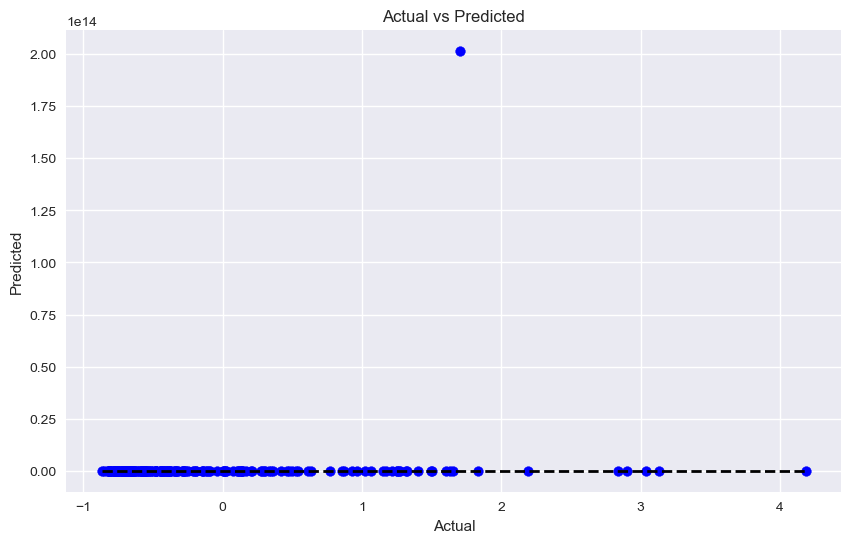

In [219]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Hyperparameter Tuning using Grid Search Cross-validation


In [220]:
# number of features in X_train
len(X_train.columns)

822

In [222]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 22))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

TypeError: 'list' object is not callable

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047136,0.005077,0.006189,0.004330,1,{'n_features_to_select': 1},0.698913,0.477357,0.534524,0.654151,...,0.596477,0.080358,21,0.587780,0.649219,0.632187,0.612339,0.620516,0.620408,0.020487
1,0.042453,0.006360,0.002821,0.000732,2,{'n_features_to_select': 2},0.796439,0.634903,0.621647,0.750459,...,0.695908,0.067396,20,0.679241,0.729283,0.725690,0.704376,0.722607,0.712240,0.018599
2,0.030744,0.006174,0.002428,0.000755,3,{'n_features_to_select': 3},0.804790,0.637572,0.616544,0.753932,...,0.698319,0.070977,19,0.686125,0.732283,0.729887,0.712329,0.731432,0.718411,0.017737
3,0.026128,0.001681,0.001787,0.000730,4,{'n_features_to_select': 4},0.816038,0.661637,0.657811,0.766271,...,0.721216,0.061443,13,0.705298,0.753845,0.748594,0.730891,0.746567,0.737039,0.017618
4,0.025152,0.004854,0.002335,0.000634,5,{'n_features_to_select': 5},0.818499,0.658489,0.662622,0.775555,...,0.723944,0.063285,1,0.711680,0.760808,0.753904,0.735308,0.751911,0.742722,0.017636
5,0.022247,0.002578,0.002308,0.000390,6,{'n_features_to_select': 6},0.822689,0.653223,0.656583,0.773343,...,0.723800,0.066100,2,0.715413,0.763337,0.754812,0.736240,0.754371,0.744835,0.017160
6,0.027649,0.008411,0.003002,0.000634,7,{'n_features_to_select': 7},0.823010,0.647976,0.653937,0.769802,...,0.722138,0.067285,4,0.717270,0.767319,0.759489,0.738256,0.756316,0.747730,0.017963
7,0.022929,0.005297,0.002451,0.000843,8,{'n_features_to_select': 8},0.822888,0.646102,0.655266,0.758639,...,0.720106,0.065933,16,0.717679,0.768171,0.761010,0.740377,0.757295,0.748906,0.018088
8,0.020794,0.002443,0.002268,0.000535,9,{'n_features_to_select': 9},0.823643,0.645212,0.655266,0.756938,...,0.719738,0.066174,17,0.717927,0.768879,0.761010,0.741021,0.757680,0.749303,0.018130
9,0.017504,0.002697,0.002751,0.000669,10,{'n_features_to_select': 10},0.825866,0.644367,0.655406,0.750626,...,0.718783,0.066387,18,0.718213,0.769236,0.761275,0.743491,0.758010,0.750045,0.017967


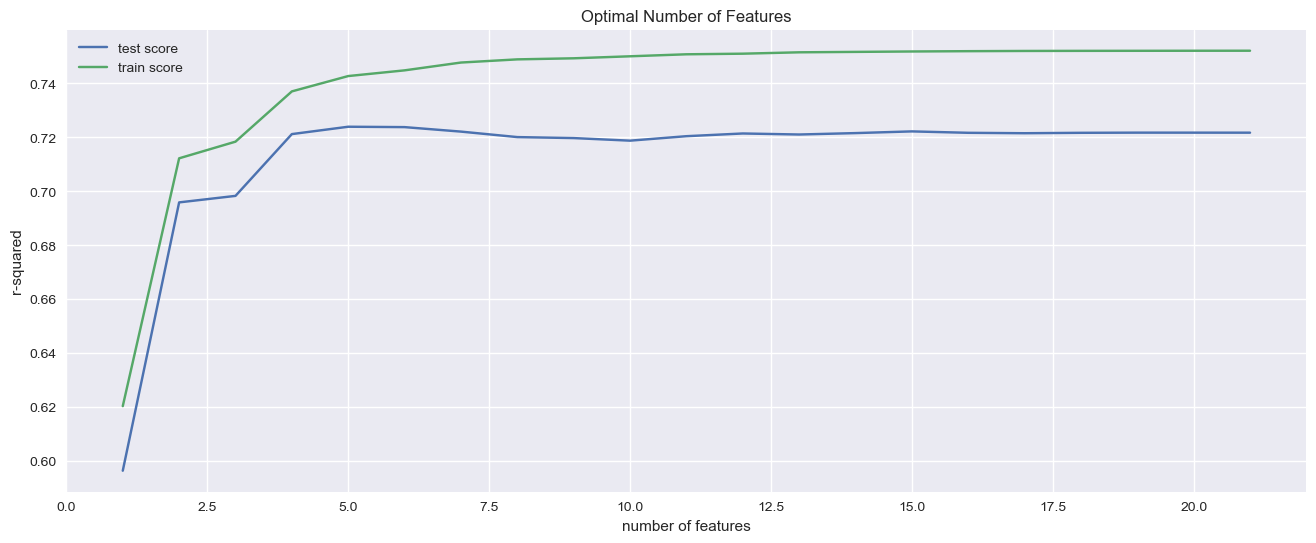

In [ ]:
# plotting cv results to help us choose the optimal value of number of features and build a final model
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
import sklearn

# final model
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.7321329042402582


In [ ]:
#Notice that the test score is very close to the 'mean test score' on the k-folds (about 72%). In general, the mean score estimated by CV will usually be a good estimate of the test score.

# 2. Other Machine Learning Models

In [ ]:
#Continue with XGBOOST


In [226]:
df.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS,POS
0,2,553,147,141381703,43,263,45,10,Major,80,4,Summer,15,latto jung kook,PROPN PROPN PROPN
1,1,1474,48,133716286,48,126,58,14,Major,71,4,Winter,11,myke towers,NOUN NOUN
2,1,1397,113,140003974,94,207,91,14,Major,51,6,Summer,14,olivia rodrigo,PROPN PROPN
3,1,7858,100,800840817,116,207,125,12,Major,55,15,Summer,12,taylor swift,PROPN NOUN
4,1,3133,50,303236322,84,133,87,15,Minor,65,6,Spring,9,bad bunny,ADJ NOUN


In [227]:
#Now, the important part: XGBoost comes with its own class for storing datasets called DMatrix. 
#It is a highly optimized class for memory and speed. That's why converting datasets into this format is a requirement for the native XGBoost API
#To enable automatic encoding of Pandas category columns, we also set enable_categorical to True

import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [228]:
mse = np.mean((actual - predicted) ** 2)
rmse = np.sqrt(mse)

NameError: name 'actual' is not defined

In [ ]:
# Training

In [231]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}

In [232]:
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [233]:
#Evaluation

from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)


In [234]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.387
